In [77]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "cmr10"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [5.3, 4]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

import Qubits


Text(0.5, 1.0, 'test $\\alpha \\beta \\omega \\Omega$')

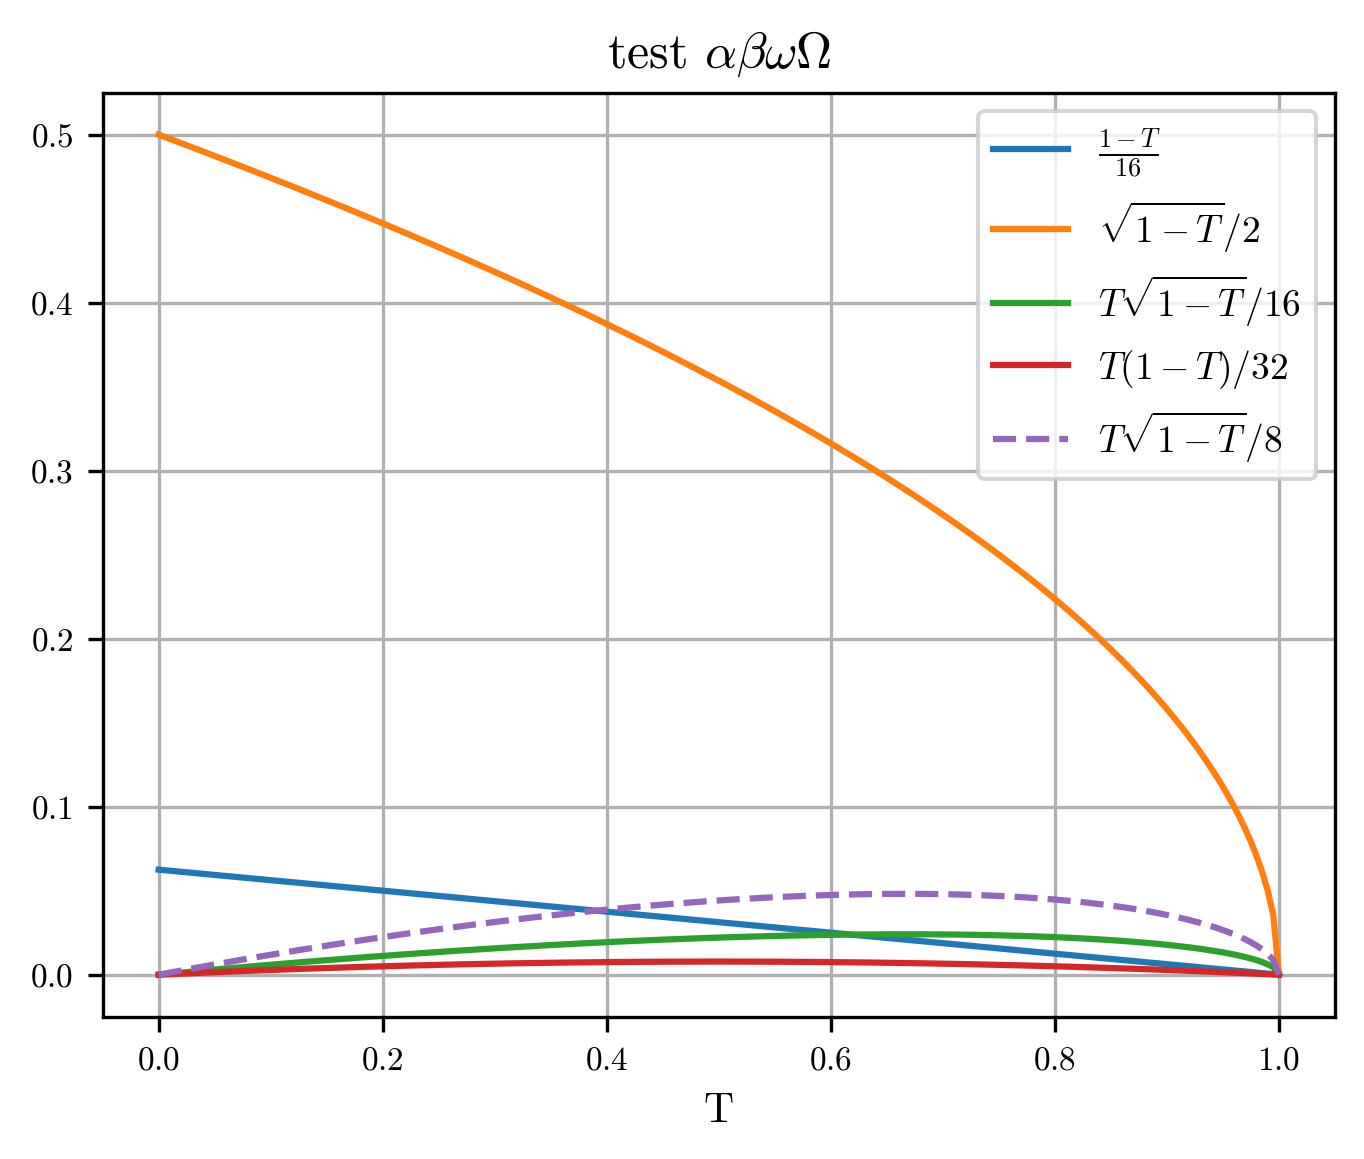

In [79]:
T = np.linspace(0, 1, 200)


plt.plot(T, (1-T)/16, label=r"$\frac{1-T}{16}$")
plt.plot(T, np.sqrt(1-T)/2, label=r"$\sqrt{1-T}/2$")
plt.plot(T, T*np.sqrt(1-T)/16, label=r"$T\sqrt{1-T}/16$")
plt.plot(T, T*(1-T)/32, label=r"$T(1-T)/32$")
plt.plot(T, T*np.sqrt(1-T)/8, "--", label=r"$T\sqrt{1-T}/8$")

plt.grid(True)
plt.legend()
plt.xlabel("T")
plt.title(r"test $\alpha \beta \omega \Omega$")

## Define T here

In [66]:
import Qubits

r = 0.2
T = np.sqrt(1-r**2)


Beenakker = Qubits.gatemon_flux(100, 1, 1, T, 0)
Beenakker.beenakker = True
Averin = Qubits.gatemon_flux(100, 1, 1, T, 0)
Averin.beenakker = False
delta_arr = np.linspace(5, 150, 200)

In [67]:
Beenakker_ground = np.zeros_like(delta_arr)
Beenakker_excited = np.zeros_like(delta_arr)
Averin_ground = np.zeros_like(delta_arr)
Averin_excited = np.zeros_like(delta_arr)

for index, delta in enumerate(delta_arr):
    Beenakker.EC = 1/delta
    Averin.EC = 1/delta

    Beenakker.solve()
    Averin.solve()

    Beenakker_ground[index] = Beenakker.eigvals[0]
    Beenakker_excited[index] = Beenakker.eigvals[1]
    Averin_ground[index] = Averin.eigvals[0]
    Averin_excited[index] = Averin.eigvals[1]

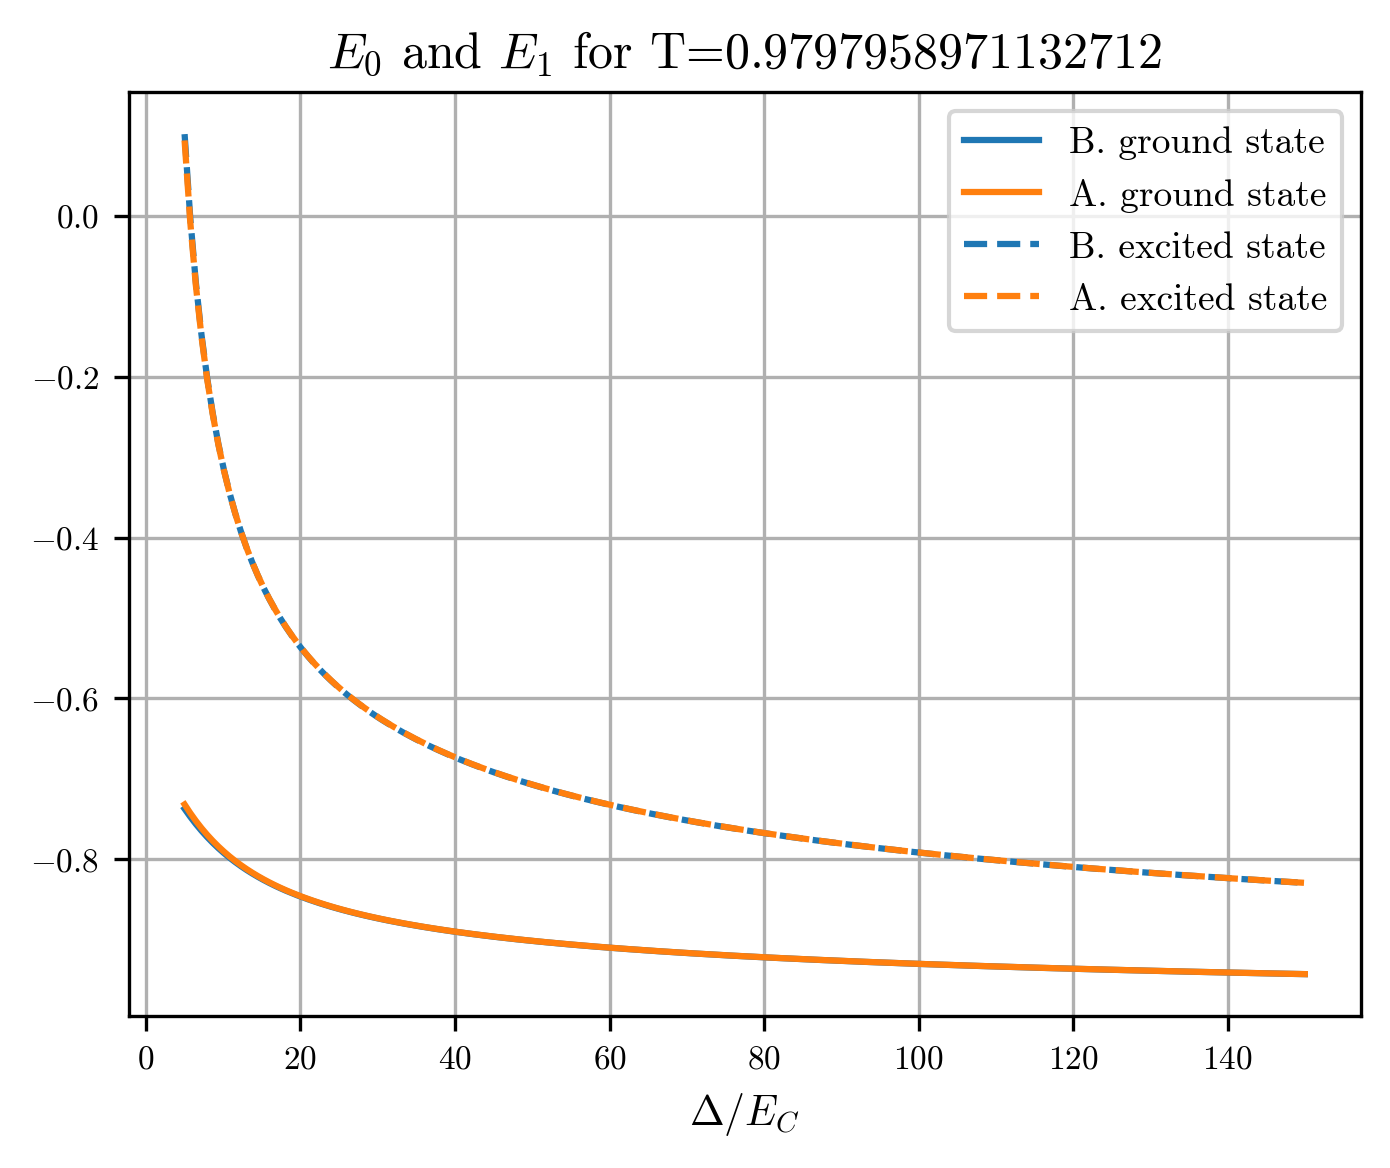

In [68]:
plt.plot(delta_arr, Beenakker_ground, color="C0", label="B. ground state")
plt.plot(delta_arr, Averin_ground, color = "C1", label="A. ground state")

plt.plot(delta_arr, Beenakker_excited, "--", color="C0", label="B. excited state")
plt.plot(delta_arr, Averin_excited,"--", color = "C1", label="A. excited state")


plt.title(r"$E_0$ and $E_1$ for T="+str(T))
plt.xlabel(r"$\Delta/E_C$")
plt.legend()
plt.grid(True)

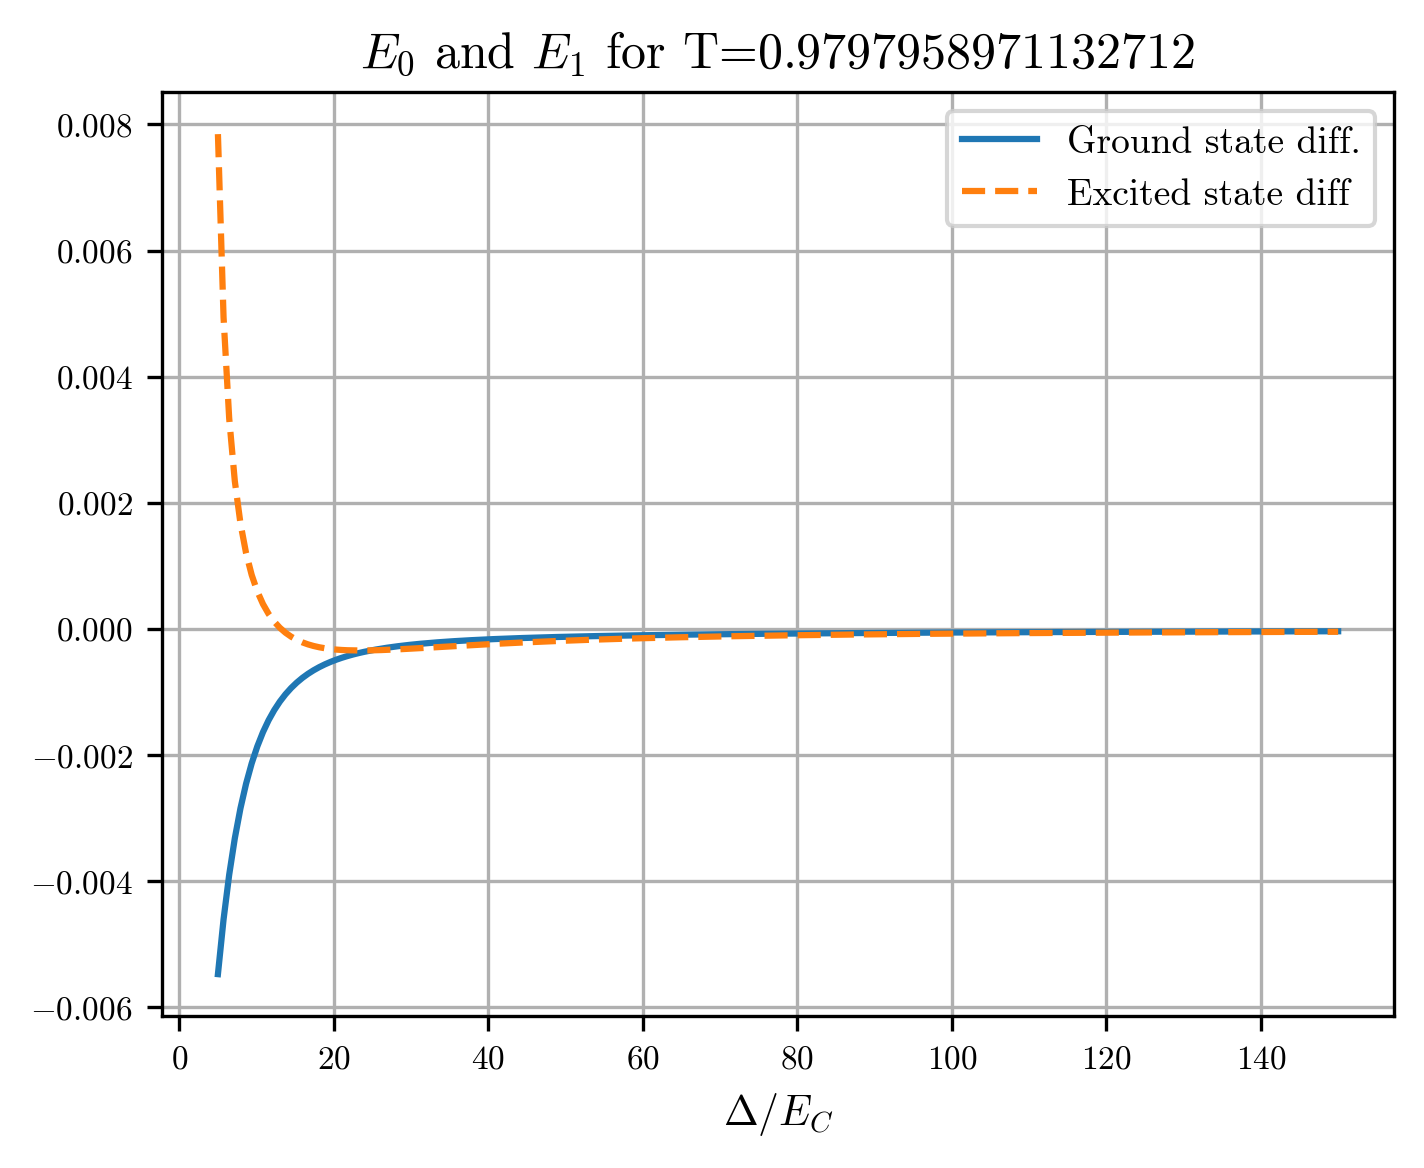

In [69]:
plt.plot(delta_arr, Beenakker_ground - Averin_ground, color="C0", label="Ground state diff.")

plt.plot(delta_arr, Beenakker_excited - Averin_excited, "--", color="C1", label="Excited state diff")


plt.title(r"$E_0$ and $E_1$ for T="+str(T))
plt.xlabel(r"$\Delta/E_C$")
plt.legend()
plt.grid(True)

In [70]:
def zeroto0(beta, r):
    m_omega_low = np.sqrt(beta/8 * np.sqrt(1-r**2))
    m_omega_high = np.sqrt(beta/8 * np.sqrt(1-r**2)/r)
    exponetial = np.exp(-np.pi**2*m_omega_low*m_omega_high/(2*m_omega_low+2*m_omega_high))

    operator_element = 2*np.pi*(m_omega_high*m_omega_low)**(5/4)/((m_omega_low+m_omega_high)*np.sqrt(2*m_omega_high+2*m_omega_low))*exponetial

    matrix_element_squared = np.abs(1/beta*r/2*operator_element)**2

    lower_energy = m_omega_low/2
    higher_energy = m_omega_high/2

    return matrix_element_squared/(lower_energy-higher_energy)


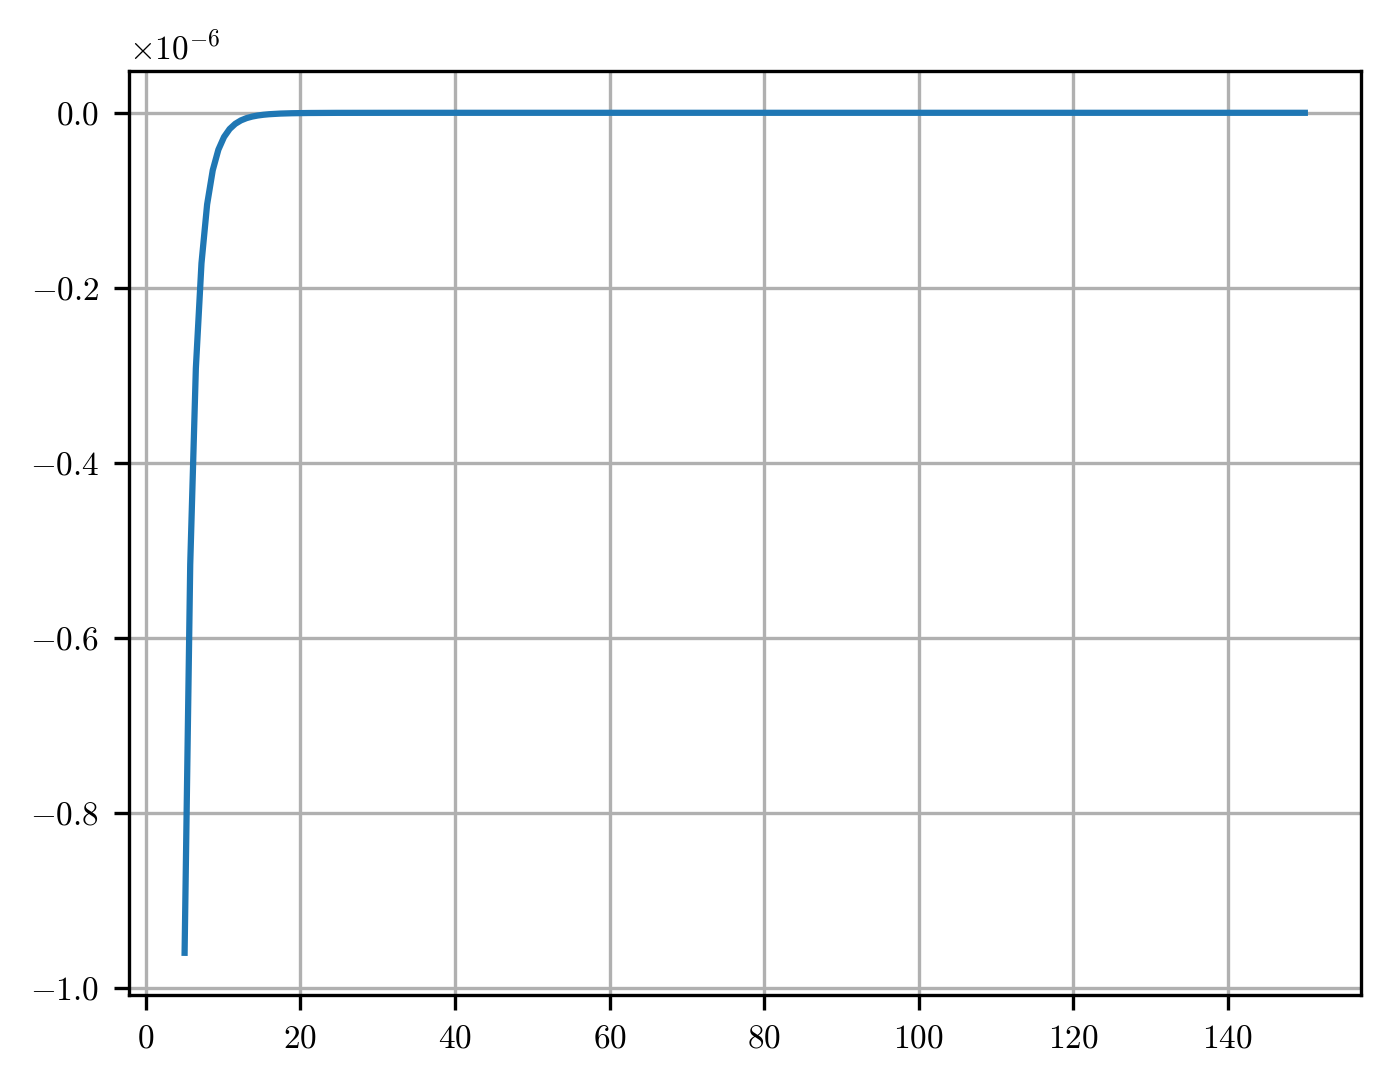

In [71]:
zeroto0_arr = zeroto0(delta_arr, 0.1)

plt.plot(delta_arr, zeroto0_arr)
#plt.plot(delta_arr, Beenakker_ground - Averin_ground, label="Ground state diff.")
#plt.ylim(-0.0001, 0.0001)
plt.grid()

In [72]:
T = 0.1
delta_arr = np.linspace(5,100, 100)

Averin_bound_states = np.zeros_like(delta_arr)
Averin_bound_states_upper = np.zeros_like(delta_arr)
Beenakker_bound_states = np.zeros_like(delta_arr)

for index, delta in enumerate(delta_arr):
    Beenakker.EC = 1/delta
    Averin.EC = 1/delta

    Beenakker.solve()
    Averin.solve()

    Beenakker_bound_states[index] = sum(Beenakker.eigvals < T/2-1)
    Averin_bound_states[index] = sum(Averin.eigvals < T/2-1)
    upper_lim = Averin.eigvals < 1
    lower_lim = Averin.eigvals > 1-T/2
    upper_interval = [a and b for a, b in zip(upper_lim, lower_lim)]

    Averin_bound_states_upper[index] = sum(upper_interval)

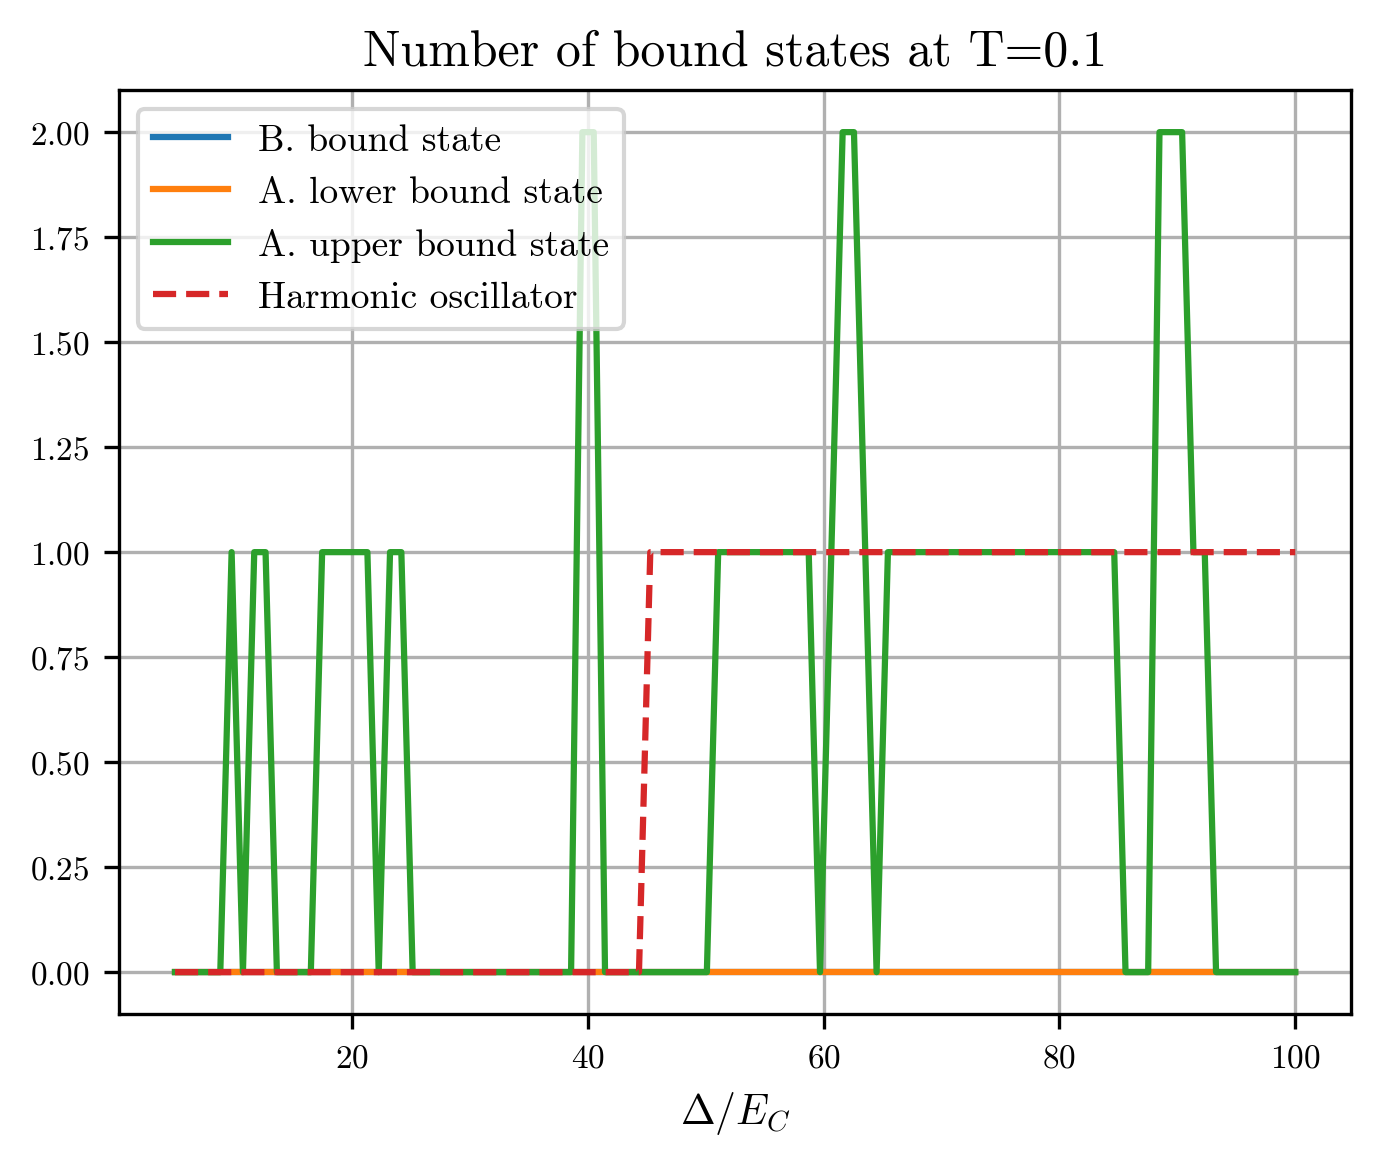

In [73]:
plt.plot(delta_arr, Beenakker_bound_states, label = "B. bound state")
plt.plot(delta_arr, Averin_bound_states, label = "A. lower bound state")
plt.plot(delta_arr, Averin_bound_states_upper, label = "A. upper bound state")
m_Omega = np.sqrt(T*delta_arr/8)
HO_states = np.sqrt(delta_arr*T/2)-1/2

#plt.plot(delta_arr, (np.floor(2*m_Omega)+1), '--', label ="Square well")
plt.plot(delta_arr, np.floor(HO_states), '--', label = "Harmonic oscillator")
plt.title("Number of bound states at T="+str(T))
plt.grid(True)
plt.xlabel(r"$\Delta/E_C$")
plt.legend()

In [74]:
from scipy import special
a = 10
x = np.linspace(-5, 5, 200)
ai, aip, bi, bip = special.airy(-(2/a)**(2/3)*(x-2)/2)

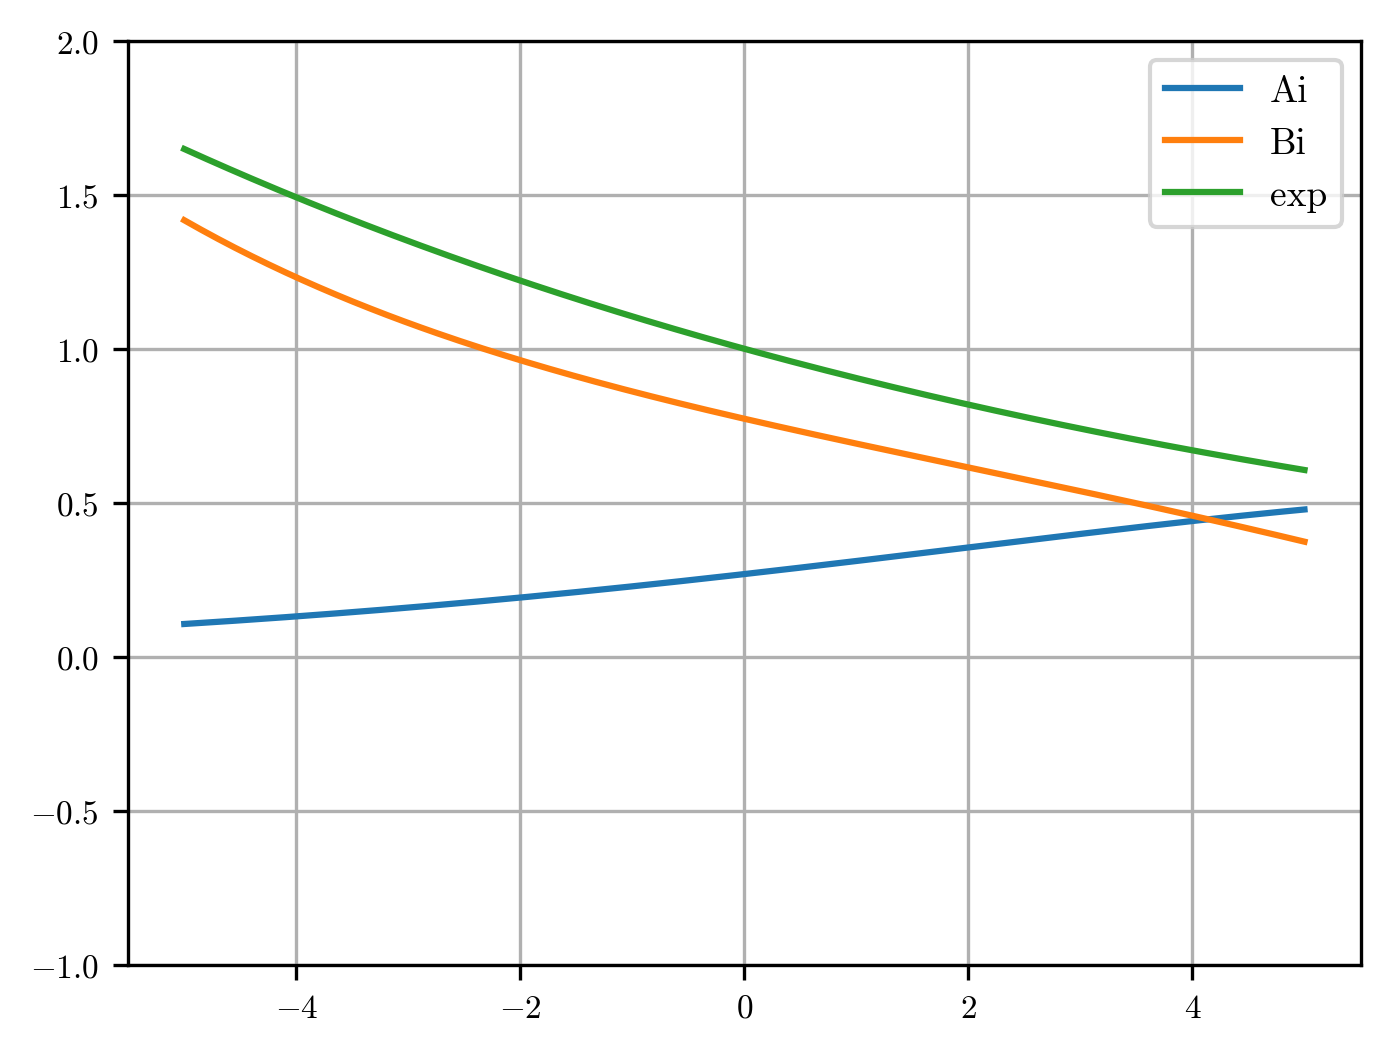

In [75]:
plt.plot(x, ai, label = "Ai")
plt.plot(x, bi, label = "Bi")
plt.plot(x, np.exp(-x/a), label = "exp")
plt.grid()
plt.ylim((-1,2))
plt.legend()